In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
from torchvision import datasets, transforms
import torch.optim as optim
from tqdm import tqdm

In [18]:
device= torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [19]:
from utils import train_transforms, test_transforms, visualise_transformation

In [20]:
from torchvision import datasets
train_data= datasets.CIFAR10(root= '../data', train= True, download= True, transform= train_transforms)
test_data= datasets.CIFAR10(root= '../data', train= False, download= True, transform= test_transforms)

Files already downloaded and verified
Files already downloaded and verified


In [21]:
dataloader_args= dict(shuffle= True, batch_size= 64, num_workers= 2, pin_memory= True) if torch.cuda.is_available() else dict(shuffle= True, batch_size= 64)
train_loader= torch.utils.data.DataLoader(train_data, **dataloader_args)
test_loader= torch.utils.data.DataLoader(test_data, **dataloader_args)

Files already downloaded and verified
Files already downloaded and verified


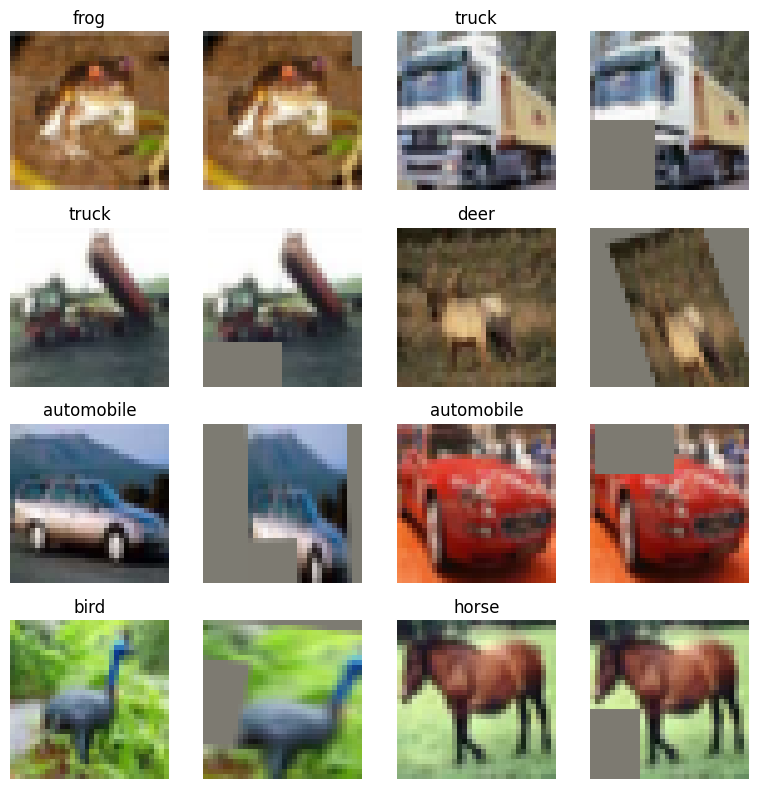

In [22]:
visualise_transformation()

In [23]:
from model import Net
model= Net().to(device)
summary(model, input_size=(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           9,216
              ReLU-6           [-1, 32, 32, 32]               0
       BatchNorm2d-7           [-1, 32, 32, 32]              64
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 32, 32, 32]           9,216
             ReLU-10           [-1, 32, 32, 32]               0
      BatchNorm2d-11           [-1, 32, 32, 32]              64
          Dropout-12           [-1, 32, 32, 32]               0
           Conv2d-13           [-1, 32, 16, 16]           9,248
           Conv2d-14           [-1, 32,

/Users/hemant/Documents/Deep_Learning_Courses/ERA_Course/Assignment_9/model.py:112: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


In [24]:
from train_test import train, test

In [25]:
from torch.optim.lr_scheduler import OneCycleLR

epochs = 50
max_lr = 0.02  # The maximum learning rate, adjust as needed
base_lr = 0.001 # The base learning rate (or initial learning rate), adjust as needed
optimizer = optim.SGD(model.parameters(), lr=base_lr, momentum=0.9)

# Initialize the OneCycleLR scheduler
scheduler = OneCycleLR(optimizer, max_lr=max_lr, epochs=epochs, steps_per_epoch=len(train_loader))

learning_rate=[]
train_accuracy=[]
test_accuracy=[]
train_losses=[]
test_losses=[]

for epoch in range(1, epochs + 1):
    print("EPOCH:", epoch)
    
    print('Learning rate:', optimizer.param_groups[0]['lr'],'\n')
    learning_rate.append(optimizer.param_groups[0]['lr'])
    
    train_acc,train_loss= train(model, device, train_loader, optimizer,scheduler)
    test_acc,test_loss= test(model, device, test_loader)
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

EPOCH: 1
Learning rate: 0.0007999999999999986 



Loss=2.061260461807251 Accuracy=35.07: 100%|██████████| 782/782 [04:13<00:00,  3.09it/s] 


TypeError: cannot unpack non-iterable NoneType object

In [16]:
import matplotlib.pyplot as plt

# Assuming you have an epochs variable that stores the number of epochs
epochs = range(len(train_accuracy))

# Create a new figure
plt.figure(figsize=(12, 5))

# Create a subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, test_accuracy, label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Create a subplot for loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.title('Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the figure
plt.tight_layout()
plt.show()

NameError: name 'train_accuracy' is not defined

In [ ]:
plt.plot(epochs, learning_rate, label='One cycle learning rate')